<a href="https://colab.research.google.com/github/DiploDatos/AnalisisYCuracion/blob/master/Entregable_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2021*

----

# Trabajo práctico entregable - parte 2


En el ejercicio 1 de la parte 1 del entregable seleccionaron las filas y columnas relevantes al problema de predicción de precios de una propiedad. Además de ello, tuvieron que reducir el número de valores posibles para las variables categóricas utilizando información de dominio.

En el ejercicio 2 de la parte 1 del entregable imputaron los valores faltantes de las columnas `Suburb` y las columnas obtenidas a partir del conjunto de datos `airbnb`.

En esta notebook, **se utilizará resultado de dichas operaciones.**


In [4]:
import matplotlib.pyplot as plt
import numpy
import pandas 

import seaborn
seaborn.set_context('talk')


import missingno as msno

In [5]:
# Acá deberían leer el conjunto de datos que ya tienen.
melb_df = pandas.read_csv('./melb_data_complet.csv')
melb_df[:3]

,Suburb,SellerG,CouncilArea,Type,BuildingArea,Rooms,Propertycount,Lattitude,Longtitude,Distance,YearBuilt,Postcode,airbnb_price_median,airbnb_weekly_price_median,airbnb_monthly_price_median
0,Abbotsford,Biggin,Yarra,h,NaN,2,4019.0,-37.7996,144.9984,2.5,NaN,3067.0,100.0,380.0,1440.0
1,Abbotsford,Biggin,Yarra,h,79.0,2,4019.0,-37.8079,144.9934,2.5,1900.0,3067.0,100.0,380.0,1440.0
2,Abbotsford,Biggin,Yarra,h,150.0,3,4019.0,-37.8093,144.9944,2.5,1900.0,3067.0,100.0,380.0,1440.0


In [6]:
melb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12448 entries, 0 to 12447
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Suburb                       12448 non-null  object 
 1   SellerG                      12448 non-null  object 
 2   CouncilArea                  11152 non-null  object 
 3   Type                         12448 non-null  object 
 4   BuildingArea                 6038 non-null   float64
 5   Rooms                        12448 non-null  int64  
 6   Propertycount                12448 non-null  float64
 7   Lattitude                    12448 non-null  float64
 8   Longtitude                   12448 non-null  float64
 9   Distance                     12448 non-null  float64
 10  YearBuilt                    7201 non-null   float64
 11  Postcode                     12448 non-null  float64
 12  airbnb_price_median          12426 non-null  float64
 13  airbnb_weekly_pr

In [7]:
melb_df.shape

(12448, 15)

## Ejercicio 1: Encoding

1. Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, **excepto** `BuildingArea` y `YearBuilt`, que volveremos a imputar más adelante.

2. Aplicar una codificación One-hot encoding a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.

Algunas opciones:
  1. Utilizar `OneHotEncoder` junto con el parámetro `categories` para las variables categóricas y luego usar `numpy.hstack` para concatenar el resultado con las variables numéricas. 
  2. `DictVectorizer` con algunos pasos de pre-proceso previo.

Recordar también que el atributo `pandas.DataFrame.values` permite acceder a la matriz de numpy subyacente a un DataFrame.


In [8]:
melb_df.columns

Index(['Suburb', 'SellerG', 'CouncilArea', 'Type', 'BuildingArea', 'Rooms',
       'Propertycount', 'Lattitude', 'Longtitude', 'Distance', 'YearBuilt',
       'Postcode', 'airbnb_price_median', 'airbnb_weekly_price_median',
       'airbnb_monthly_price_median'],
      dtype='object')

1. Seleccionamos todas las filas y columnas del conjunto de datos generados en la parte I, excepto aquellos relacionados con YearBuilt y BuildingArea.

In [9]:
melb_df2 = melb_df.drop(columns=['YearBuilt', 'BuildingArea'])
melb_df2.columns

Index(['Suburb', 'SellerG', 'CouncilArea', 'Type', 'Rooms', 'Propertycount',
       'Lattitude', 'Longtitude', 'Distance', 'Postcode',
       'airbnb_price_median', 'airbnb_weekly_price_median',
       'airbnb_monthly_price_median'],
      dtype='object')

2. Codificación de variables categóricas

Definimos una lista de las columnas que se corresponden a variables categoricas para realizar la codificación.

In [10]:
columns_to_encode = ['Type', 'SellerG', 'Suburb', 'CouncilArea']

Tratamiento de valores faltantes antes de realizar la codificación

<AxesSubplot:>

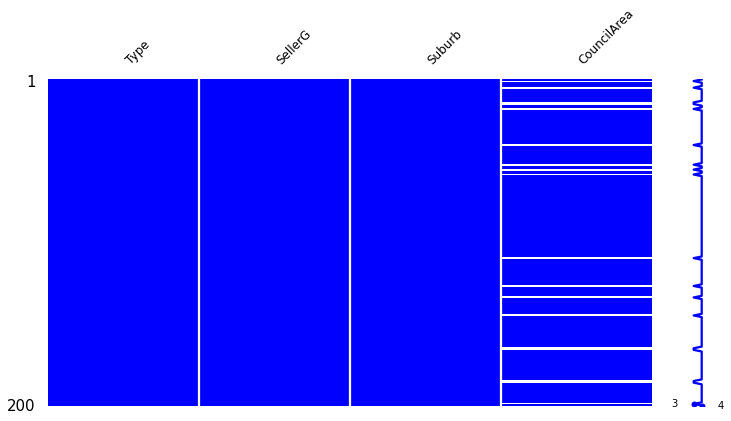

In [11]:
# melb_df.CouncilArea.value_counts()
msno.matrix(melb_df2[columns_to_encode].sample(200), figsize=(12, 6), fontsize=12, color=[0, 0, 1])

CouncilArea es la única variable categórica que tiene valores faltantes. La ciudad de Melbourne tiene un total de 32 municipios cubriendo el área metropolitana (algunos se extienden a áreas rurales cercanas). 

En nuestro dataset la cantidad de categorias reflejadas para esta variable es de 33. Notar que hay una categoría que se denomina 'Unavailable' y que contiene sólo un registro, éste fue designado al conjunto NaN para su tratamiento (este conjunto no es considerado una clase de la variable categórica en cuestión). Esto nos dice que en nuestro conjunto de datos contamos con todas las categorias reales de CouncilArea.

In [12]:
melb_df2.CouncilArea.nunique()

33

In [13]:
melb_df2.CouncilArea.unique()

array(['Yarra', 'Moonee Valley', 'Port Phillip', 'Darebin', 'Hobsons Bay',
       'Stonnington', 'Boroondara', 'Monash', 'Glen Eira', 'Whitehorse',
       'Maribyrnong', 'Bayside', 'Moreland', 'Manningham', 'Banyule',
       'Melbourne', 'Kingston', 'Brimbank', 'Hume', nan, 'Knox',
       'Maroondah', 'Casey', 'Melton', 'Greater Dandenong', 'Whittlesea',
       'Nillumbik', 'Frankston', 'Macedon Ranges', 'Yarra Ranges',
       'Wyndham', 'Cardinia', 'Unavailable', 'Moorabool'], dtype=object)

In [14]:
melb_df2[melb_df['CouncilArea'] == 'Unavailable']

,Suburb,SellerG,CouncilArea,Type,Rooms,Propertycount,Lattitude,Longtitude,Distance,Postcode,airbnb_price_median,airbnb_weekly_price_median,airbnb_monthly_price_median
9018,Hampton,RT,Unavailable,h,3,5454.0,-37.93434,145.00816,13.8,3188.0,163.0,650.0,2500.0


In [15]:
melb_df2[melb_df2['CouncilArea'] == 'Unavailable'] = numpy.nan

In [16]:
melb_df2[melb_df2['CouncilArea'] == 'Unavailable']

,Suburb,SellerG,CouncilArea,Type,Rooms,Propertycount,Lattitude,Longtitude,Distance,Postcode,airbnb_price_median,airbnb_weekly_price_median,airbnb_monthly_price_median


In [17]:
melb_df2.CouncilArea.nunique()

32

Ahora tenemos dentro de CouncilArea 32 categorías y un conjunto con registros asociados a datos faltantes. Al final de la imputación vamos a obtener la cantidad real de categorías, es decir, 32.

Realizamos una exploración para intentar imputar los valores faltantes de CouncilArea. Las variables que nos pueden ayudar son Suburb y Postcode.

In [18]:
melb_df2[['CouncilArea','Suburb', 'Postcode']]

,CouncilArea,Suburb,Postcode
0,Yarra,Abbotsford,3067.0
1,Yarra,Abbotsford,3067.0
2,Yarra,Abbotsford,3067.0
3,Yarra,Abbotsford,3067.0
4,Yarra,Abbotsford,3067.0
...,...,...,...
12443,NaN,Wheelers Hill,3150.0
12444,NaN,Williamstown,3016.0
12445,NaN,Williamstown,3016.0
12446,NaN,Williamstown,3016.0


In [19]:
(melb_df2[melb_df2.CouncilArea.isna()])[['Suburb', 'Postcode']] #Suburb y postcode cuando CouncilArea es NaN

,Suburb,Postcode
6868,Brighton East,3187.0
9018,NaN,NaN
9845,Reservoir,3073.0
11154,Aberfeldie,3040.0
11155,Albion,3020.0
...,...,...
12443,Wheelers Hill,3150.0
12444,Williamstown,3016.0
12445,Williamstown,3016.0
12446,Williamstown,3016.0


In [20]:
df_ca_not_null = melb_df2[melb_df2.CouncilArea.notna()] #Creo dataframe con los registros con CouncilArea no NaN

len(df_ca_not_null.Postcode.unique()) #cantidad de valores distintos de Postcode con CouncilArea no NaN

194

In [21]:
len(df_ca_not_null.Suburb.unique()) #cantidad de valores distintos de Suburb con CouncilArea no NaN

306

In [22]:
df_ca_null = melb_df2[melb_df2.CouncilArea.isna()] #dataframe con los registros con CouncilArea NaN

len(df_ca_null.Postcode.unique()) #cantidad de los distintos valores de Postcode con CouncilArea no NaN

169

In [23]:
len(df_ca_null.Suburb.unique())

261

Vamos a elegir la información de Postcode para imputar los valores faltantes de CouncilArea ya que tiene menor cantidad de valores únicos en df_ca_null. Con ésto intentaríamos evitar que luego ambas variables tengan una correlación alta.

In [24]:
postcode_list_ca_null = (df_ca_null).Postcode.unique().tolist() #lista de postcodes únicos cuando CouncilArea es NaN
print(postcode_list_ca_null)

[3187.0, nan, 3073.0, 3040.0, 3020.0, 3078.0, 3018.0, 3028.0, 3025.0, 3143.0, 3032.0, 3183.0, 3104.0, 3153.0, 3165.0, 3193.0, 3130.0, 3128.0, 3088.0, 3186.0, 3047.0, 3056.0, 3057.0, 3083.0, 3023.0, 3151.0, 3124.0, 3054.0, 3145.0, 3192.0, 3169.0, 3068.0, 3058.0, 3048.0, 3064.0, 3136.0, 3175.0, 3089.0, 3172.0, 3108.0, 3109.0, 3111.0, 3754.0, 3095.0, 3184.0, 3076.0, 3041.0, 3060.0, 3156.0, 3065.0, 3031.0, 3011.0, 3199.0, 3043.0, 3146.0, 3150.0, 3046.0, 3059.0, 3188.0, 3190.0, 3029.0, 3166.0, 3021.0, 3033.0, 3101.0, 3102.0, 3075.0, 3012.0, 3337.0, 3194.0, 3039.0, 3189.0, 3195.0, 3149.0, 3170.0, 3015.0, 3042.0, 3051.0, 3070.0, 3167.0, 3204.0, 3044.0, 3030.0, 3207.0, 3181.0, 3121.0, 3134.0, 3205.0, 3141.0, 3171.0, 3429.0, 3038.0, 3071.0, 3113.0, 3003.0, 3016.0, 3013.0, 3147.0, 3049.0, 3019.0, 3055.0, 3105.0, 3125.0, 3126.0, 3053.0, 3066.0, 3437.0, 3122.0, 3123.0, 3135.0, 3081.0, 3037.0, 3099.0, 3079.0, 3036.0, 3144.0, 3338.0, 3206.0, 3082.0, 3132.0, 3127.0, 3138.0, 3163.0, 3072.0, 3084.0, 31

In [25]:
#df con los postcodes que tienen asociado CouncilArea no nulo al menos una vez pero que aparecen en el listado 
#de los postcodes asociados a al menos un CouncilArea 
df_common_postcodes = df_ca_not_null[df_ca_not_null.Postcode.isin(postcode_list_ca_null)] 

#diccionario con Postcode como clave y CouncilArea como valor
dictionary = dict(zip(df_common_postcodes.Postcode, df_common_postcodes.CouncilArea)) 
print(len(dictionary))
dictionary

166


{3067.0: 'Yarra',
 3042.0: 'Brimbank',
 3206.0: 'Port Phillip',
 3078.0: 'Darebin',
 3018.0: 'Hobsons Bay',
 3025.0: 'Hobsons Bay',
 3143.0: 'Stonnington',
 3032.0: 'Moonee Valley',
 3147.0: 'Monash',
 3034.0: 'Moonee Valley',
 3183.0: 'Port Phillip',
 3103.0: 'Boroondara',
 3104.0: 'Boroondara',
 3204.0: 'Glen Eira',
 3165.0: 'Glen Eira',
 3128.0: 'Whitehorse',
 3019.0: 'Maribyrnong',
 3186.0: 'Bayside',
 3187.0: 'Bayside',
 3056.0: 'Moreland',
 3055.0: 'Moreland',
 3105.0: 'Manningham',
 3125.0: 'Whitehorse',
 3124.0: 'Boroondara',
 3126.0: 'Boroondara',
 3054.0: 'Yarra',
 3163.0: 'Glen Eira',
 3162.0: 'Glen Eira',
 3148.0: 'Monash',
 3068.0: 'Yarra',
 3058.0: 'Moreland',
 3066.0: 'Yarra',
 3108.0: 'Manningham',
 3084.0: 'Banyule',
 3185.0: 'Glen Eira',
 3184.0: 'Port Phillip',
 3040.0: 'Moonee Valley',
 3041.0: 'Moonee Valley',
 3065.0: 'Yarra',
 3031.0: 'Melbourne',
 3011.0: 'Maribyrnong',
 3146.0: 'Boroondara',
 3046.0: 'Moreland',
 3043.0: 'Hume',
 3188.0: 'Bayside',
 3122.0: 'Bo

In [26]:
 #diccionario que va a contener, como claves: índices donde hay CouncilArea NaN y como valores: 
 #CouncilArea que le corresponde de acuerdo a dictionary (o sea su Postcode)

dict_to_replace_ca = {}      
for i in range(df_ca_null.shape[0]):  #recorremos el df de CouncilArea NaN
  if df_ca_null.iloc[i].Postcode in dictionary.keys():                                        #Si el postcode de la iteración actual está dentro del dictionary, 
    dict_to_replace_ca.update({df_ca_null.index[i]: dictionary[df_ca_null.iloc[i].Postcode]}) #Agrega al diccionario que estamos armando el par (Clave: valor), 
                                                                                              #que tiene clave: el índice y valor: el CouncilArea que corresponde de acuerdo a dictionary

dict_to_replace_ca

{6868: 'Bayside',
 9845: 'Darebin',
 11154: 'Moonee Valley',
 11155: 'Brimbank',
 11156: 'Darebin',
 11157: 'Hobsons Bay',
 11158: 'Hobsons Bay',
 11159: 'Hobsons Bay',
 11160: 'Stonnington',
 11161: 'Stonnington',
 11162: 'Moonee Valley',
 11163: 'Port Phillip',
 11164: 'Boroondara',
 11165: 'Boroondara',
 11166: 'Boroondara',
 11167: 'Knox',
 11168: 'Glen Eira',
 11169: 'Glen Eira',
 11170: 'Glen Eira',
 11171: 'Bayside',
 11172: 'Whitehorse',
 11173: 'Whitehorse',
 11174: 'Whitehorse',
 11175: 'Whitehorse',
 11176: 'Whitehorse',
 11177: 'Banyule',
 11178: 'Bayside',
 11179: 'Bayside',
 11180: 'Bayside',
 11181: 'Bayside',
 11182: 'Hume',
 11183: 'Moreland',
 11184: 'Moreland',
 11185: 'Moreland',
 11186: 'Banyule',
 11187: 'Banyule',
 11188: 'Melton',
 11189: 'Whitehorse',
 11190: 'Boroondara',
 11191: 'Boroondara',
 11192: 'Yarra',
 11193: 'Stonnington',
 11194: 'Kingston',
 11195: 'Kingston',
 11196: 'Yarra',
 11197: 'Moreland',
 11198: 'Moreland',
 11199: 'Moreland',
 11200: 'Mor

In [27]:
Melb_df_encoded = melb_df2.copy()
Melb_df_encoded['CouncilArea'] = Melb_df_encoded['CouncilArea'].fillna(dict_to_replace_ca) #Reemplazamos en el df final todo lo que corresponde a CouncilArea NaN con la info del último 
                                                                                               #diccionario creado
Melb_df_encoded.CouncilArea

0              Yarra
1              Yarra
2              Yarra
3              Yarra
4              Yarra
            ...     
12443         Monash
12444    Hobsons Bay
12445    Hobsons Bay
12446    Hobsons Bay
12447    Maribyrnong
Name: CouncilArea, Length: 12448, dtype: object

In [28]:
print(Melb_df_encoded.CouncilArea.isna().sum()) #Acá muestro cuantos registros son NaN
print(len(Melb_df_encoded))          #Acá muestro la cantidad de filas del df completo

3
12448


In [29]:
Melb_df_encoded.dropna(subset=['CouncilArea'], axis=0, how='any', inplace=True) #dropeamos los 3 registros que quedaron con valores faltantes en CouncilArea

In [30]:
Melb_df_encoded.isnull().sum()

Suburb                            0
SellerG                           0
CouncilArea                       0
Type                              0
Rooms                             0
Propertycount                     0
Lattitude                         0
Longtitude                        0
Distance                          0
Postcode                          0
airbnb_price_median              21
airbnb_weekly_price_median      831
airbnb_monthly_price_median    1202
dtype: int64

Hacemos OneHot Encoding en las columnas identificadas

In [31]:
for i in columns_to_encode:
  print(f'La cantidad de categorías de {i} a codificar son: {Melb_df_encoded[i].nunique()}')

La cantidad de categorías de Type a codificar son: 3
La cantidad de categorías de SellerG a codificar son: 259
La cantidad de categorías de Suburb a codificar son: 310
La cantidad de categorías de CouncilArea a codificar son: 32


Como se observa, la cantidad de columnas que se van a generar es muy alta, de aquí la importancia de agrupar para reducirlas.

Nota: vamos a codificar todas las categorías de CouncilArea ya que tomar acciones como seleccionar aquellas categorías con mayor grado de ocurrencia implicaría achicar el dataset. Por ejemplo, podríamos utilizar las 10 o 20 CouncilArea con más frecuencia, pero esto produce una reducción importante de la cantidad de datos. Lo mismo para el resto de las variables categóricas.

Creemos que para realizar una reducción de categorías, y que además sea representativa conservando la mayor cantidad de datos posibles, necesitamos analizar con más detalle el contexto del problema y apoyarnos con fuentes de datos externas. También podríamos utilizar variables como latitud y longitud para hacer el agrupamiento pero por razones de tiempo no podemos acceder a esta opción.

Para un futuro trabajo sería válido analizar estas cuestiones ya que manejar una gran cantidad de columnas extras generadas por la codificación resulta inviable en terminos de recursos cuando las variables categóricas contienen grandes cantidades de clases.

In [32]:
from sklearn.preprocessing import OneHotEncoder

encoded_melb_df = pandas.get_dummies(Melb_df_encoded, columns=columns_to_encode)

In [33]:
#encoded_melb_df.loc[6743]
#encoded_melb_df.loc[6743, encoded_melb_df.columns[pandas.Series(encoded_melb_df.columns).str.startswith('Council')]]


In [34]:
encoded_melb_df[:5]

,Rooms,Propertycount,Lattitude,Longtitude,Distance,Postcode,airbnb_price_median,airbnb_weekly_price_median,airbnb_monthly_price_median,Type_h,...,CouncilArea_Moorabool,CouncilArea_Moreland,CouncilArea_Nillumbik,CouncilArea_Port Phillip,CouncilArea_Stonnington,CouncilArea_Whitehorse,CouncilArea_Whittlesea,CouncilArea_Wyndham,CouncilArea_Yarra,CouncilArea_Yarra Ranges
0,2.0,4019.0,-37.7996,144.9984,2.5,3067.0,100.0,380.0,1440.0,1,...,0,0,0,0,0,0,0,0,1,0
1,2.0,4019.0,-37.8079,144.9934,2.5,3067.0,100.0,380.0,1440.0,1,...,0,0,0,0,0,0,0,0,1,0
2,3.0,4019.0,-37.8093,144.9944,2.5,3067.0,100.0,380.0,1440.0,1,...,0,0,0,0,0,0,0,0,1,0
3,3.0,4019.0,-37.7969,144.9969,2.5,3067.0,100.0,380.0,1440.0,1,...,0,0,0,0,0,0,0,0,1,0
4,4.0,4019.0,-37.8072,144.9941,2.5,3067.0,100.0,380.0,1440.0,1,...,0,0,0,0,0,0,0,0,1,0


In [35]:
print(f'Dimensiones (original): {len(melb_df2.columns)}')
print(f'Dimensiones (despues del encoding): {len(encoded_melb_df.columns)}')

Dimensiones (original): 13
Dimensiones (despues del encoding): 613


## Ejercicio 2: Imputación por KNN

En el teórico se presentó el método `IterativeImputer` para imputar valores faltantes en variables numéricas. Sin embargo, los ejemplos presentados sólo utilizaban algunas variables numéricas presentes en el conjunto de datos. En este ejercicio, utilizaremos la matriz de datos codificada para imputar datos faltantes de manera más precisa.

1. Agregue a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.
2. Aplique una instancia de `IterativeImputer` con un estimador `KNeighborsRegressor` para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?
3. Realice un gráfico mostrando la distribución de cada variable antes de ser imputada, y con ambos métodos de imputación.

**1. Agregue a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.**

In [36]:
encoded_melb_df = encoded_melb_df.join(melb_df[['YearBuilt', 'BuildingArea']])

**2. Aplique una instancia de `IterativeImputer` con un estimador `KNeighborsRegressor` para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?**



A continuacion vamos a mostrar graficos de la imputacion para ambas columnas, con los datos escalados y no escalados. 

Cuando se usa un algoritmo en el que se asocia como similar un vector con otro esa similitud suele medirse (aunque no siempre) con la distancia euclidea, como es el caso de KNN. Esto quiere decir que todas las columnas (features) van a tener la misma importancia (si no proveemos un array con los pesos de cada una) por lo cual para la correcta asociacion de vecinos mas cercanos es necesario que todas esten en la misma escala.

In [37]:
#estandarizamos
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(encoded_melb_df.to_numpy())
melb_data_scaled = scaler.transform(encoded_melb_df.to_numpy())
melb_data_scaled = pandas.DataFrame(melb_data_scaled, columns=encoded_melb_df.columns)

Vamos a utilizar solo las variables numéricas para la imputacion de valores faltantes usando KNN.

In [38]:
numerical = [var for var in melb_df.columns if (melb_df[var].dtype == float) or (melb_df[var].dtype == int)]
numerical

['BuildingArea',
 'Propertycount',
 'Lattitude',
 'Longtitude',
 'Distance',
 'YearBuilt',
 'Postcode',
 'airbnb_price_median',
 'airbnb_weekly_price_median',
 'airbnb_monthly_price_median']

In [39]:
encoded_melb_df[numerical].isnull().sum()

BuildingArea                   6408
Propertycount                     0
Lattitude                         0
Longtitude                        0
Distance                          0
YearBuilt                      5245
Postcode                          0
airbnb_price_median              21
airbnb_weekly_price_median      831
airbnb_monthly_price_median    1202
dtype: int64

In [40]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer


melb_data_mice_scaled = melb_data_scaled.copy(deep=True)

imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
melb_data_mice_scaled[numerical] = imputer.fit_transform(melb_data_mice_scaled[numerical])



D:\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


Chequeamos que hayan 0 filas para datos nullos en ambas columnas

In [41]:
print(len(melb_data_mice_scaled[melb_data_mice_scaled['BuildingArea'].isna()]))
print(len(melb_data_mice_scaled[melb_data_mice_scaled['YearBuilt'].isna()]))

0
0


**3. Realice un gráfico mostrando la distribución de cada variable antes de ser imputada, y con ambos métodos de imputación.**

In [42]:
#Para los gráficos
#imputacion KNN sin estandarizar
melb_data_mice= encoded_melb_df.copy(deep=True)
melb_data_mice[numerical] = imputer.fit_transform(melb_data_mice[numerical])

#Volvemos a los datos sin escalar para poder hacer los gráficos de forma interpretable
melb_data_mice_unscaled = scaler.inverse_transform(melb_data_mice_scaled.to_numpy())
melb_data_mice_unscaled = pandas.DataFrame(melb_data_mice_unscaled, columns=encoded_melb_df.columns)


D:\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [43]:
print(len(melb_data_mice[melb_data_mice['BuildingArea'].isna()]))
print(len(melb_data_mice[melb_data_mice['YearBuilt'].isna()]))

0
0


#### Sin scaling

###### YearBuilt

(1850.0, 2050.0)

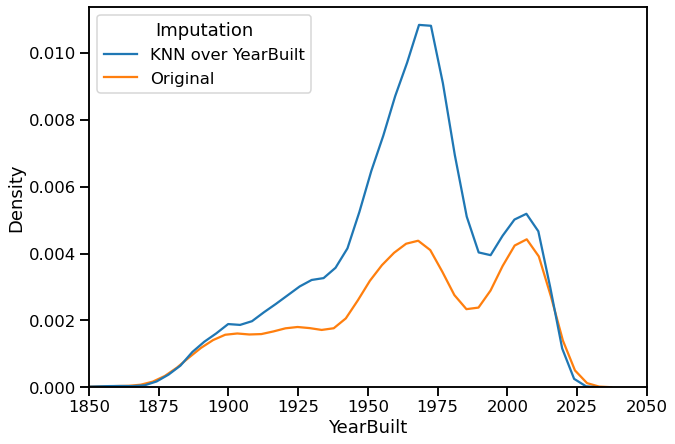

In [44]:
mice_year_built = melb_data_mice.YearBuilt.to_frame()
mice_year_built['Imputation'] = 'KNN over YearBuilt'

melb_year_build = melb_df.YearBuilt.dropna().to_frame()
melb_year_build['Imputation'] = 'Original'

data = pandas.concat([mice_year_built, melb_year_build], ignore_index=True) #agregué: ignore_index=True para solucionar el error
fig = plt.figure(figsize=(10, 7))
g = seaborn.kdeplot(data=data, x='YearBuilt', hue='Imputation')
plt.xlim([1850, 2050])


###### BuildingArea

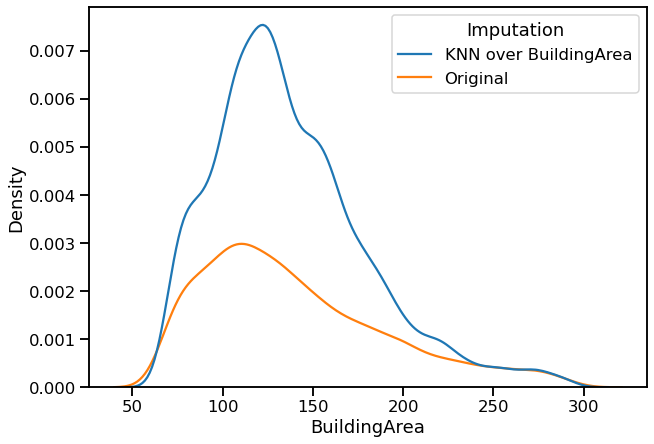

In [45]:
mice_year_built = melb_data_mice.BuildingArea.to_frame()
mice_year_built['Imputation'] = 'KNN over BuildingArea'

melb_year_build = melb_df.BuildingArea.dropna().to_frame()
melb_year_build['Imputation'] = 'Original'

data = pandas.concat([mice_year_built, melb_year_build], ignore_index=True) #agregué: ignore_index=True para solucionar el error
fig = plt.figure(figsize=(10, 7))
g = seaborn.kdeplot(data=data, x='BuildingArea', hue='Imputation')

#### Con scaling

##### YearBuilt

1196.0


(1850.0, 2050.0)

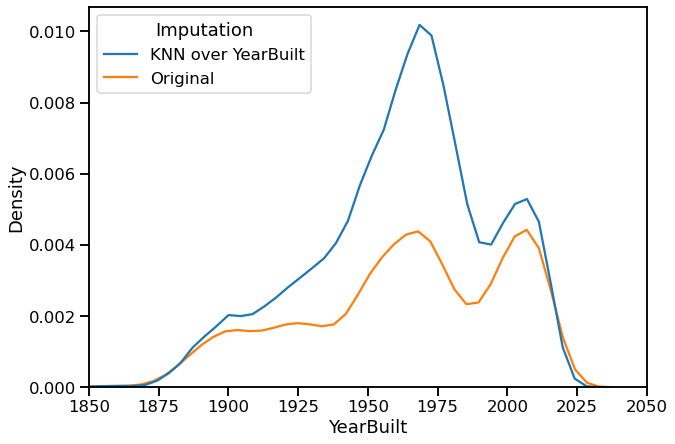

In [46]:
mice_year_built = melb_data_mice_unscaled.YearBuilt.to_frame()
mice_year_built['Imputation'] = 'KNN over YearBuilt'

melb_year_build = encoded_melb_df.YearBuilt.dropna().to_frame()
melb_year_build['Imputation'] = 'Original'

data = pandas.concat([mice_year_built, melb_year_build], ignore_index=True) #agregué: ignore_index=True para solucionar el error

fig = plt.figure(figsize=(10, 7))
g = seaborn.kdeplot(data=data, x='YearBuilt', hue='Imputation')
print(encoded_melb_df.YearBuilt.min())
plt.xlim(1850, 2050)

##### BuildingArea

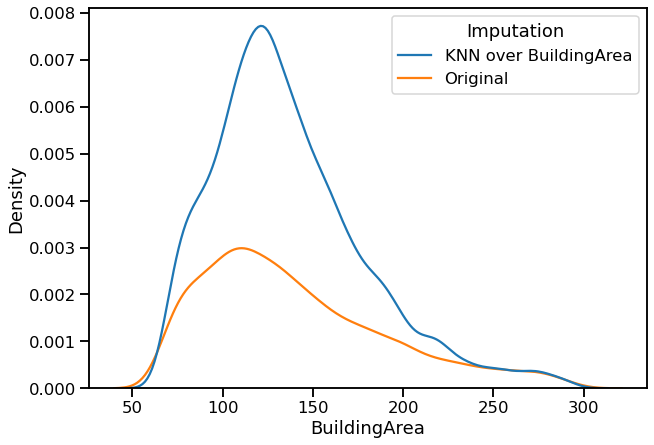

In [47]:
mice_year_built = melb_data_mice_unscaled.BuildingArea.to_frame()
mice_year_built['Imputation'] = 'KNN over BuildingArea'

melb_year_build = encoded_melb_df.BuildingArea.dropna().to_frame()
melb_year_build['Imputation'] = 'Original'

data = pandas.concat([mice_year_built, melb_year_build], ignore_index=True) #agregué: ignore_index=True para solucionar el error

fig = plt.figure(figsize=(10, 7))
g = seaborn.kdeplot(data=data, x='BuildingArea', hue='Imputation')


Como se puede observar en los gráficos imputar valores faltantes usando KNN busca acercarse a la distribución de la variable original. Además, realizar una estandarización de los datos antes de imputar por KNN mejora la aproximación de ambas distribuciones. En la variable YearBuilt esto se puede ver con mayor claridad mediante el gráfico.

Los resultados  mejorarían si en la imputación KNN se usaran todas las columnas del dataset. Esto implica, nuevamente, solucionar el problema de dimensionalidad generado por la codificación de las variables categóricas en los incisos anteriores.

## Ejercicio 3: Reducción de dimensionalidad.

Utilizando la matriz obtenida en el ejercicio anterior:
1. Aplique `PCA` para obtener $n$ componentes principales de la matriz, donde `n = min(20, X.shape[0])`. ¿Es necesario estandarizar o escalar los datos?
2. Grafique la varianza capturada por los primeros $n$ componentes principales, para cada $n$.
3. En base al gráfico, seleccione las primeras $m$ columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

**1. Aplique `PCA` para obtener $n$ componentes principales de la matriz, donde `n = min(20, X.shape[0])`. ¿Es necesario estandarizar o escalar los datos?**

El proceso de PCA identifica aquellas direcciones en las que la varianza es mayor. Como la varianza de una variable se mide en su misma escala elevada al cuadrado, si antes de calcular las componentes no se estandarizan todas las variables para que tengan media 0 y desviación estándar 1, aquellas variables cuya escala sea mayor dominarán al resto. De ahí que sea recomendable estandarizar siempre los datos.




**PCA con estandarizado**

In [48]:
from sklearn.decomposition import PCA

n_dim = min(20, melb_data_mice_scaled.shape[0])
pca = PCA(n_dim)
melb_dim_red = pca.fit_transform(melb_data_mice_scaled)

Grafica de la varianza capturada por los primeros $n$ componentes principales, para cada $n$.

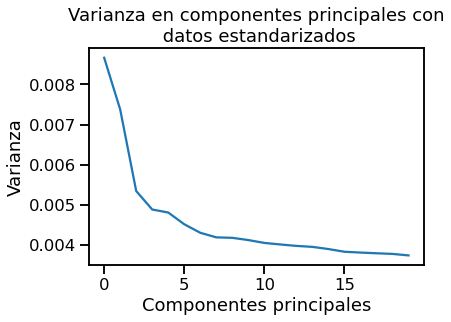

In [49]:
plt.plot(range(0, n_dim), pca.explained_variance_ratio_)
plt.ylabel('Varianza')
plt.xlabel('Componentes principales')
plt.title('Varianza en componentes principales con\n datos estandarizados')
plt.show()


In [50]:
 pca.explained_variance_ratio_

array([0.00866734, 0.00737594, 0.00533981, 0.00487824, 0.004803  ,
       0.00451023, 0.0042973 , 0.00418285, 0.00417146, 0.00411528,
       0.00404409, 0.0040055 , 0.00396979, 0.00394541, 0.00389136,
       0.00382333, 0.00380333, 0.00378583, 0.00376962, 0.00373217])

**PCA con escalado**

Volvemos a realizar los mismos pasos que en estandarizado, sólo que vamos a regresar al ejercicio 2 para imputar valores nulos con KNN partiendo de un conjunto de datos escalados con MinMaxScaler.

In [51]:
from sklearn.preprocessing import MinMaxScaler

# Scale encoded melb_df
scaler_min_max = MinMaxScaler()
scaler_min_max.fit(encoded_melb_df.to_numpy())
melb_data_scaled_min_max = scaler_min_max.transform(encoded_melb_df.to_numpy())
melb_data_scaled_min_max = pandas.DataFrame(melb_data_scaled_min_max, columns=encoded_melb_df.columns)

In [52]:
#KNN usando variables numéricas
melb_data_mice_scaled_min_max= melb_data_scaled_min_max.copy(deep=True)
melb_data_mice_scaled_min_max[numerical] = imputer.fit_transform(melb_data_mice_scaled_min_max[numerical])

D:\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [53]:
#PCA con datos escalados
n_dim_2 = min(20, melb_data_mice_scaled_min_max.shape[0])
pca_2 = PCA(n_dim_2)
melb_dim_red_2 = pca_2.fit_transform(melb_data_mice_scaled_min_max)

Grafica de la varianza capturada por los primeros $n$ componentes principales, para cada $n$.

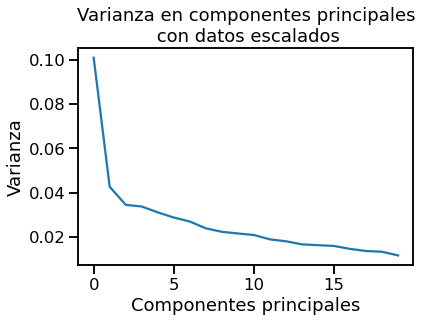

In [54]:
plt.plot(range(0, n_dim_2), pca_2.explained_variance_ratio_)
plt.ylabel('Varianza')
plt.xlabel('Componentes principales')
plt.title('Varianza en componentes principales\n con datos escalados')
plt.show()


In [55]:
 pca_2.explained_variance_ratio_

array([0.10093879, 0.04265084, 0.03450397, 0.03372631, 0.03109868,
       0.02877271, 0.02695427, 0.02389385, 0.02231731, 0.0215633 ,
       0.02087837, 0.01891203, 0.01803317, 0.01665089, 0.01627817,
       0.0159279 , 0.01459203, 0.01365822, 0.01330446, 0.01164978])

El porcentaje de varianza explicada por las 3 primeras componentes es mayor haciendo un escalado que un estandarizado, por lo que sería conveniente realizar esta última técnica para un PCA.

La gráfica de sedimentación muestra que los valores de la varianza explicada comienzan a formar una línea recta después del tercer componente principal. Por lo tanto, los componentes principales restantes explican una proporción muy pequeña de la variabilidad (cercana a cero) y probablemente carezcan de importancia.

A continuación hacemos la selección de las primeras $m$ columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

In [56]:
n_pca_components = 3
melb_pca_to_add = melb_dim_red_2[:, 0:n_pca_components]

In [57]:
melb_pca_to_add

array([[-0.25624345, -0.05869225,  0.05943477],
       [-0.23161929, -0.04303782,  0.06192121],
       [-0.31905044, -0.08542969,  0.0491118 ],
       ...,
       [-0.34825878, -0.16584462, -0.09571561],
       [-0.40137435, -0.19757789, -0.12432671],
       [-0.38620369, -0.14313026, -0.17379072]])

## Ejercicio 4: Composición del resultado

Transformar nuevamente el conjunto de datos procesado en un `pandas.DataFrame` y guardarlo en un archivo.

Para eso, será necesario recordar el nombre original de cada columna de la matriz, en el orden correcto. Tener en cuenta:
1. El método `OneHotEncoder.get_feature_names` o el atributo `OneHotEncoder.categories_` permiten obtener una lista con los valores de la categoría que le corresponde a cada índice de la matriz.
2. Ninguno de los métodos aplicados intercambia de lugar las columnas o las filas de la matriz.

In [58]:
melb_extended_pca = numpy.hstack([melb_data_mice_scaled, melb_pca_to_add])

new_pca_cols = [f'pca{i}' for i in range(1, n_pca_components + 1)]
all_columns = [col_name.lower() for col_name in melb_data_mice_scaled.columns.to_list()] + new_pca_cols
melb_extended_pca_df = pandas.DataFrame(data=melb_extended_pca, columns=all_columns)


In [59]:
melb_extended_pca_df[:10]

,rooms,propertycount,lattitude,longtitude,distance,postcode,airbnb_price_median,airbnb_weekly_price_median,airbnb_monthly_price_median,type_h,...,councilarea_whitehorse,councilarea_whittlesea,councilarea_wyndham,councilarea_yarra,councilarea_yarra ranges,yearbuilt,buildingarea,pca1,pca2,pca3
0,-1.108755,-0.775199,0.112137,0.035623,-1.32196,-0.415265,0.43428,-0.722429,-0.627648,0.626892,...,-0.172348,-0.131644,-0.099087,4.400937,-0.042082,-0.306554,-0.632691,-0.256243,-0.058692,0.059435
1,-1.108755,-0.775199,0.008348,-0.011873,-1.32196,-0.415265,0.43428,-0.722429,-0.627648,0.626892,...,-0.172348,-0.131644,-0.099087,4.400937,-0.042082,-1.672676,-1.195117,-0.231619,-0.043038,0.061921
2,0.058726,-0.775199,-0.009158,-0.002374,-1.32196,-0.415265,0.43428,-0.722429,-0.627648,0.626892,...,-0.172348,-0.131644,-0.099087,4.400937,-0.042082,-1.672676,0.191420,-0.319050,-0.085430,0.049112
3,0.058726,-0.775199,0.145899,0.021374,-1.32196,-0.415265,0.43428,-0.722429,-0.627648,0.626892,...,-0.172348,-0.131644,-0.099087,4.400937,-0.042082,-0.306554,-0.632691,-0.308053,-0.075619,0.050104
4,1.226207,-0.775199,0.017102,-0.005224,-1.32196,-0.415265,0.43428,-0.722429,-0.627648,0.626892,...,-0.172348,-0.131644,-0.099087,4.400937,-0.042082,1.345501,0.035191,-0.414647,0.587550,0.247670
5,-1.108755,-0.775199,0.055866,0.006175,-1.32196,-0.415265,0.43428,-0.722429,-0.627648,0.626892,...,-0.172348,-0.131644,-0.099087,4.400937,-0.042082,-1.630316,-0.820166,-0.234030,-0.196996,0.612708
6,0.058726,-0.775199,0.077124,0.044172,-1.32196,-0.415265,0.43428,-0.722429,-0.627648,0.626892,...,-0.172348,-0.131644,-0.099087,4.400937,-0.042082,-1.407924,1.363141,-0.399144,0.581872,0.257924
7,-1.108755,-0.775199,0.032107,0.007125,-1.32196,-0.415265,0.43428,-0.722429,-0.627648,0.626892,...,-0.172348,-0.131644,-0.099087,4.400937,-0.042082,-1.937428,-0.648314,-0.295737,0.634491,0.272437
8,-2.276237,-0.775199,0.097131,0.025174,-1.32196,-0.415265,0.43428,-0.722429,-0.627648,-1.595172,...,-0.172348,-0.131644,-0.099087,4.400937,-0.042082,-0.306554,-0.632691,1.135755,0.061318,0.069242
9,-1.108755,-0.775199,0.094630,0.040373,-1.32196,-0.415265,0.43428,-0.722429,-0.627648,0.626892,...,-0.172348,-0.131644,-0.099087,4.400937,-0.042082,-1.672676,-1.273232,-0.229842,-0.040740,0.062712


In [60]:
melb_extended_pca_df.columns

Index(['rooms', 'propertycount', 'lattitude', 'longtitude', 'distance',
       'postcode', 'airbnb_price_median', 'airbnb_weekly_price_median',
       'airbnb_monthly_price_median', 'type_h',
       ...
       'councilarea_whitehorse', 'councilarea_whittlesea',
       'councilarea_wyndham', 'councilarea_yarra', 'councilarea_yarra ranges',
       'yearbuilt', 'buildingarea', 'pca1', 'pca2', 'pca3'],
      dtype='object', length=618)

In [61]:
##Archivo para descargar
melb_extended_pca_df.to_csv('melb_pca_extended.csv')

In [ ]:
from google.colab import files
files.download('melb_pca_extended.csv') 

In [ ]:
# ## Small example
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import OneHotEncoder

# ## If we process our data with the following steps:
# categorical_cols = ['Type', 'Regionname']
# numerical_cols = ['Rooms', 'Distance']
# new_columns = []

# # Step 1: encode categorical columns
# encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
# X_cat = encoder.fit_transform(melb_df[categorical_cols])
# for col, col_values in zip(categorical_cols, encoder.categories_):
#   for col_value in col_values:
#     new_columns.append('{}={}'.format(col, col_value))
# print("Matrix has shape {}, with columns: {}".format(X_cat.shape, new_columns))

# # Step 2: Append the numerical columns
# X = numpy.hstack([X_cat, melb_df[numerical_cols].values])
# new_columns.extend(numerical_cols)
# print("Matrix has shape {}, with columns: {}".format(X_cat.shape, new_columns))

# # Step 3: Append some new features, like PCA
# pca = PCA(n_components=2)
# pca_dummy_features = pca.fit_transform(X)
# X_pca = numpy.hstack([X, pca_dummy_features])
# new_columns.extend(['pca1', 'pca2'])

# ## Re-build dataframe
# processed_melb_df = pandas.DataFrame(data=X_pca, columns=new_columns)
# processed_melb_df.head()

## Ejercicio 5: Documentación

En un documento `.pdf` o `.md` realizar un reporte de las operaciones que realizaron para obtener el conjunto de datos final. Se debe incluir:
  1. Criterios de exclusión (o inclusión) de filas
  2. Interpretación de las columnas presentes
  2. Todas las transofrmaciones realizadas

Este documento es de uso técnico exclusivamente, y su objetivo es permitir que otres desarrolladores puedan reproducir los mismos pasos y obtener el mismo resultado. Debe ser detallado pero consiso. Por ejemplo:

```
  ## Criterios de exclusión de ejemplos
  1. Se eliminan ejemplos donde el año de construcción es previo a 1900

  ## Características seleccionadas
  ### Características categóricas
  1. Type: tipo de propiedad. 3 valores posibles
  2. ...
  Todas las características categóricas fueron codificadas con un
  método OneHotEncoding utilizando como máximo sus 30 valores más 
  frecuentes.
  
  ### Características numéricas
  1. Rooms: Cantidad de habitaciones
  2. Distance: Distancia al centro de la ciudad.
  3. airbnb_mean_price: Se agrega el precio promedio diario de 
     publicaciones de la plataforma AirBnB en el mismo código 
     postal. [Link al repositorio con datos externos].

  ### Transformaciones:
  1. Todas las características numéricas fueron estandarizadas.
  2. La columna `Suburb` fue imputada utilizando el método ...
  3. Las columnas `YearBuilt` y ... fueron imputadas utilizando el 
     algoritmo ...
  4. ...

  ### Datos aumentados
  1. Se agregan las 5 primeras columnas obtenidas a través del
     método de PCA, aplicado sobre el conjunto de datos
     totalmente procesado.
```
